# Project 4: Percolation in correlated systems

In this final project we apply the tools we have learned to study percolation
to a system generated by correlated noise. The system we will be studying will be generated
using the diamond-square algorithm, based on an implementation by Cormac Rogers which can be found
[here](https://github.com/Crowgers/Diamond_Square).  

The diamond-square algorithm is a method for generating heightmaps for computer graphics, also
known as the random midpoint displacement fractal, the cloud fractal or plasma fractal 
\[[1](https://en.wikipedia.org/wiki/Diamond-square_algorithm)\].
It begins with a 2D square array of width and height $2^n +1$. The four corner points are set to inital random values.
The diamond and square steps are performed alternately until all values are set:  
**Diamond step**: For each square in the array, set the midpoint of that square to be the average
of the four corner points plus a random value.  
**Square step**: For each diamond in the array, set the midpoint of that diamond to be the average
of the four corner points plus a random value.  
The magnitude of the random value is reduced each iteration. Points on the edges of the array
are wrapped around.

![diamond-square](https://upload.wikimedia.org/wikipedia/commons/b/bf/Diamond_Square.svg)
By Christopher Ewin - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=42510593

To investigate the effects of correlated noise, we will be studying quantities such as the *percolation threshold*,
*percolation probability*, *density of the spanning cluster*, etc.
We will also be comparing our results to our previous studies of systems generated using white noise,
to study how correlations in the system affect percolation.

In [1]:
import seaborn as sns
import sys
from scipy.ndimage import measurements
from scipy.ndimage.filters import gaussian_filter
from pylab import *

In [2]:
sns.set(font_scale=2)
rcParams['figure.figsize'] = [16, 14]

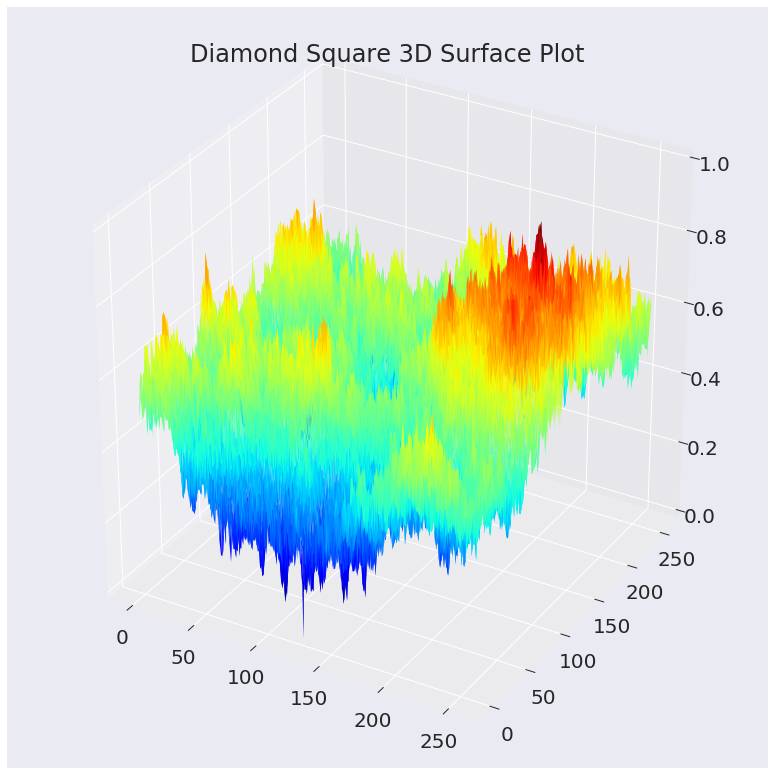

In [3]:
from methods import *

p = 0.45
ds_steps = 8
max_rnd = 1.0
plot_type = '3d'
max_index = 2**ds_steps
L = 2**ds_steps + 1

seeded_map = f_seed_grid(L, max_rnd)
final_height_map = f_dsmain(seeded_map, ds_steps, max_index, max_rnd)

#final_height_map = gaussian_filter(final_height_map, sigma=1)
final_height_map += abs(final_height_map.min())
final_height_map /= abs(final_height_map.max())

f_plotting(final_height_map, max_index, plot_type)
savefig('plots/3d_surface')
show()

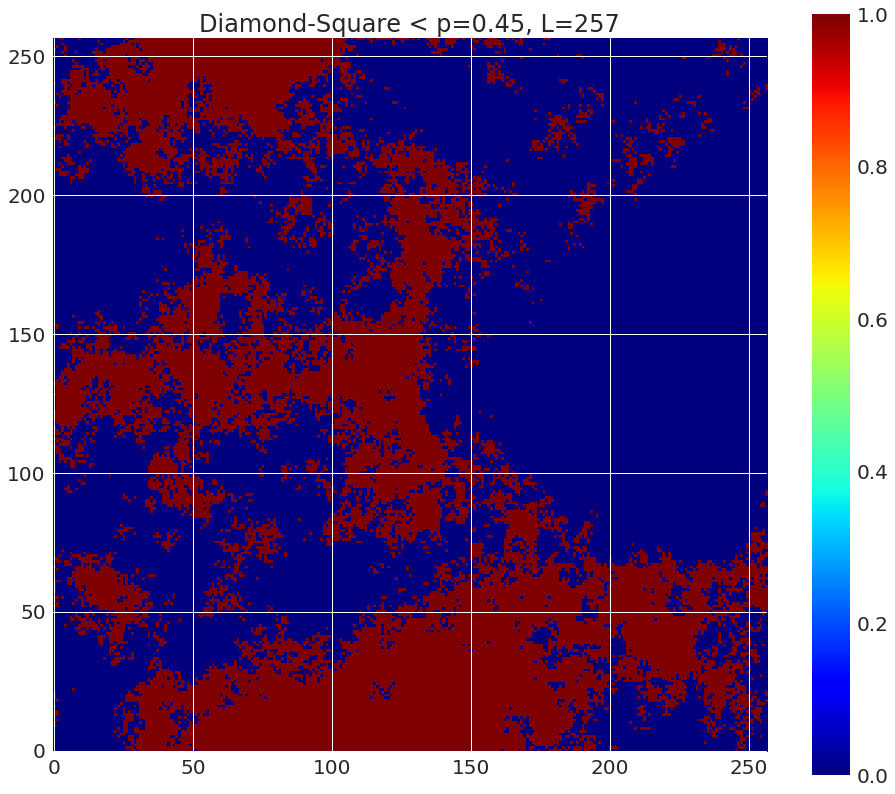

In [4]:
z = final_height_map < p

imshow(z, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title('Diamond-Square < p=%.2f, L=%d' % (p,L))
savefig('plots/binary_ds')
show()

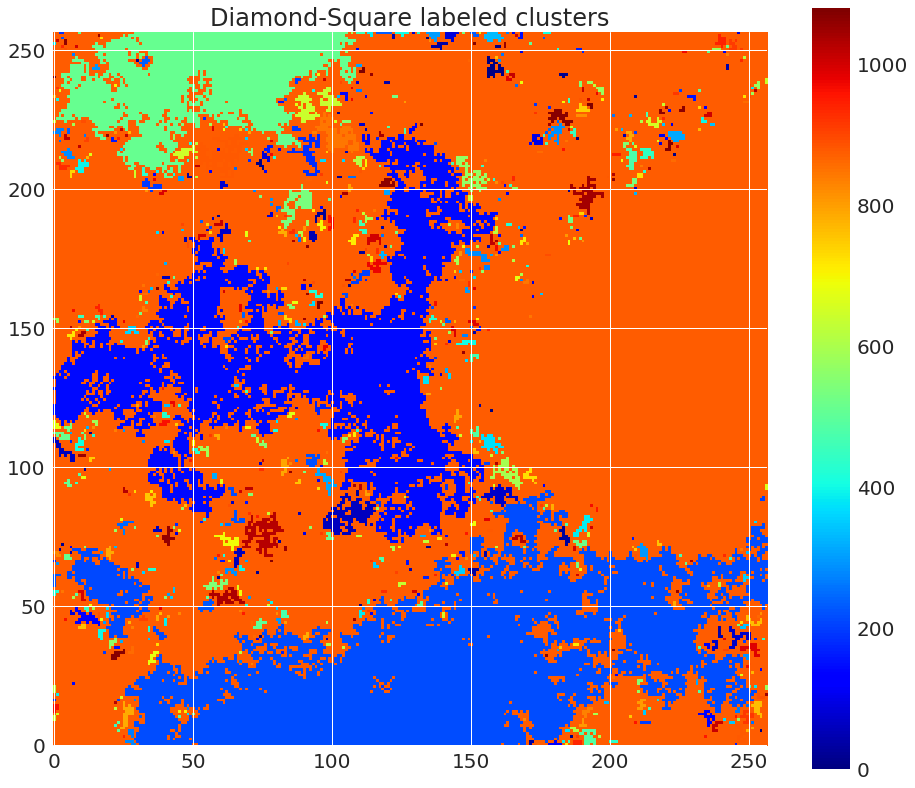

In [5]:
lw, num = measurements.label(z)
b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]

imshow(shuffledLw, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Diamond-Square labeled clusters")
savefig('plots/labeled_ds')
show()

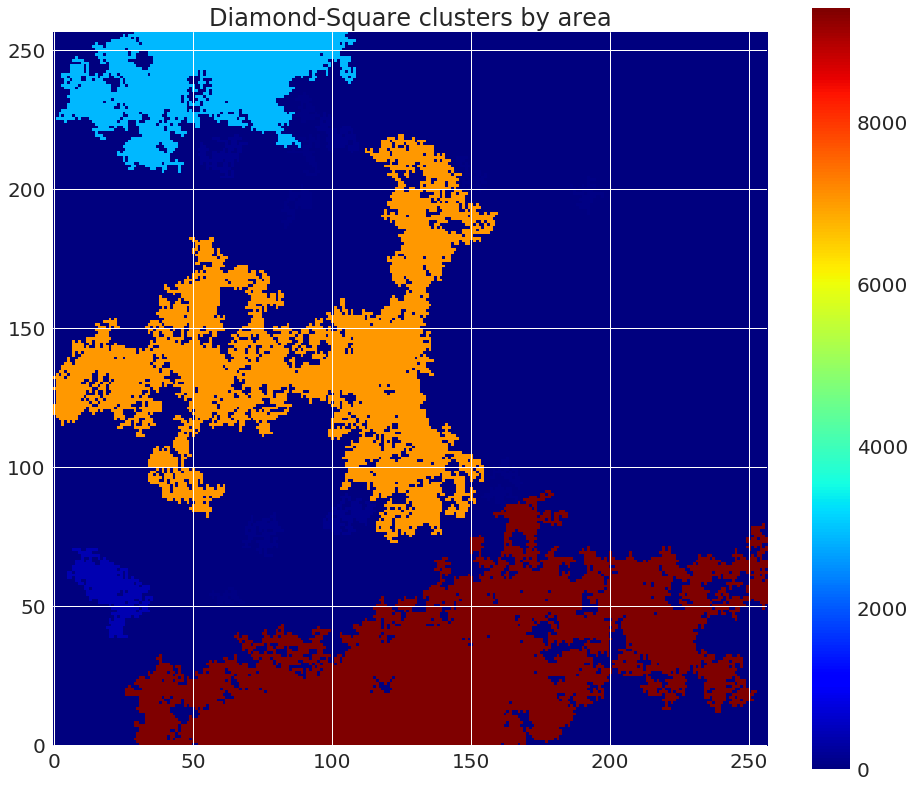

In [6]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]

imshow(areaImg, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Diamond-Square clusters by area")
savefig('plots/area_ds')
show()

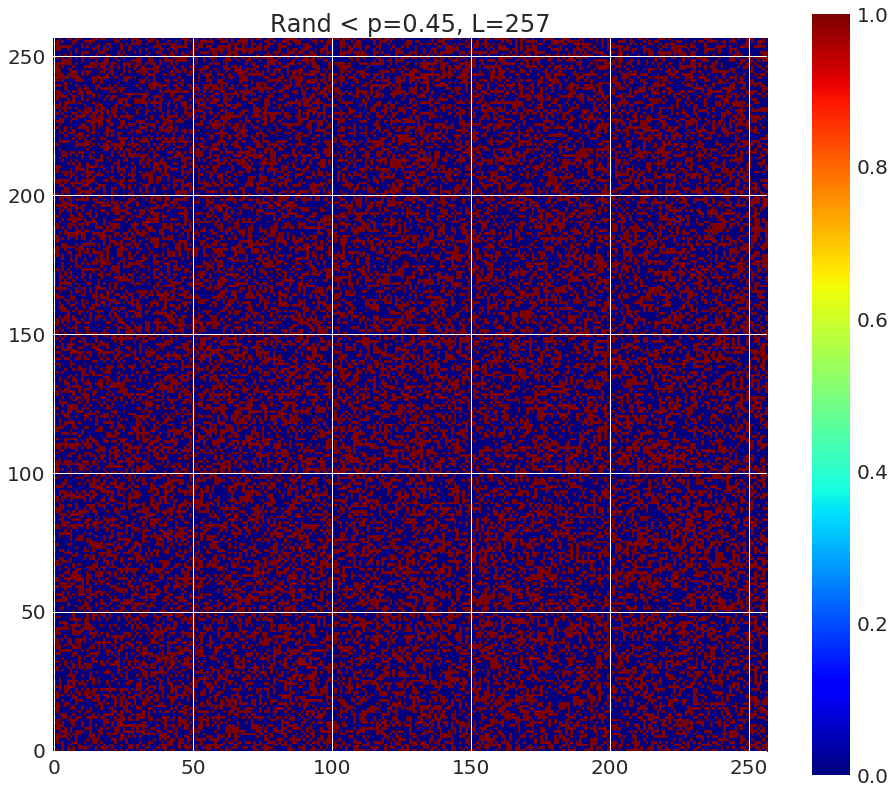

In [7]:
L = 2**ds_steps + 1
r = rand(L,L)
z = r < p

imshow(z, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title('Rand < p=%.2f, L=%d' % (p,L))
savefig('plots/binary_rand')
show()

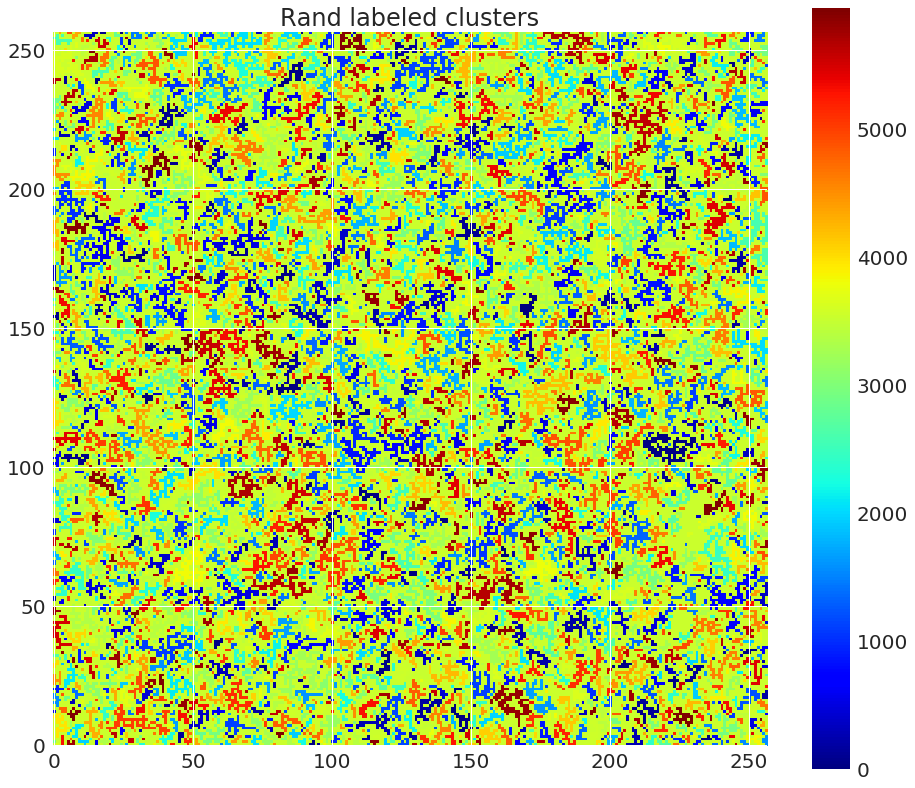

In [8]:
lw, num = measurements.label(z)
b = arange(lw.max() + 1)
shuffle(b)
shuffledLw = b[lw]

imshow(shuffledLw, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Rand labeled clusters")
savefig('plots/labeled_rand')
show()

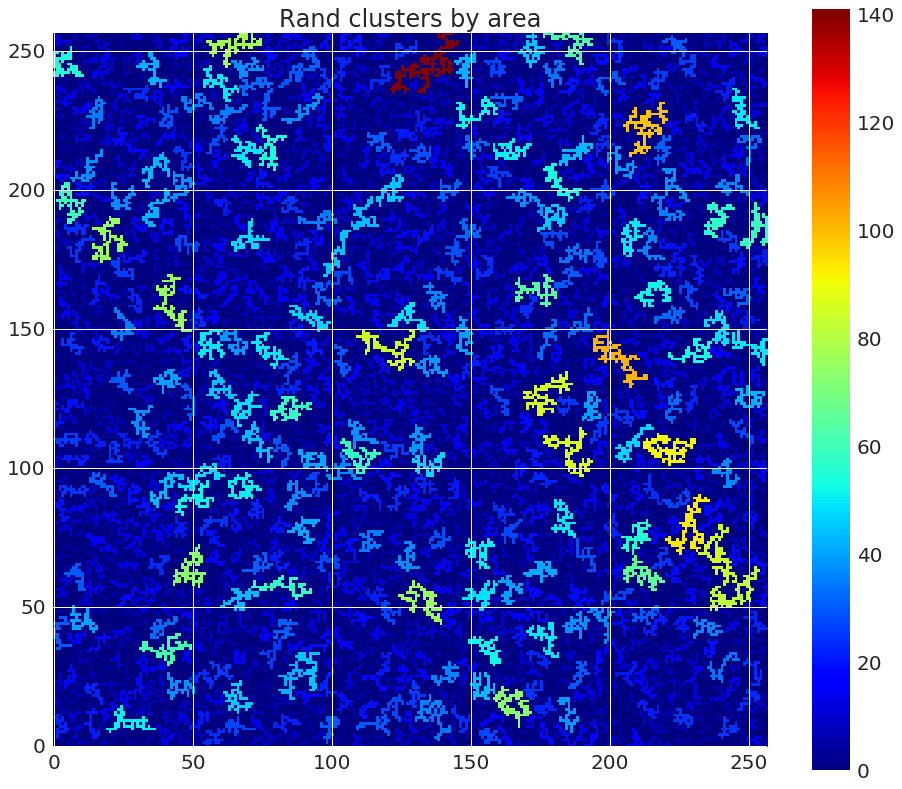

In [9]:
area = measurements.sum(z, lw, index=arange(lw.max() + 1))
areaImg = area[lw]

imshow(areaImg, origin='lower', interpolation='nearest', cmap='jet')
colorbar()
title("Rand clusters by area")
savefig('plots/area_rand')
show()

In [10]:
%timeit for i in range(100): final_height_map = f_dsmain(seeded_map, ds_steps, max_index, max_rnd)

12.5 s ± 120 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [11]:
%timeit for i in range(100): rand(L,L)

46.9 ms ± 164 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
